In [94]:
# install.packages(c('maps', 'gganimate', 'plotly', 'showtext'))

Installing package into 'C:/Users/ellys/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

also installing the dependencies 'sysfonts', 'showtextdb'




package 'sysfonts' successfully unpacked and MD5 sums checked
package 'showtextdb' successfully unpacked and MD5 sums checked
package 'showtext' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ellys\AppData\Local\Temp\Rtmpiy5nHP\downloaded_packages


In [96]:
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(lubridate))
suppressMessages(library(maps))
suppressMessages(library(gganimate))
suppressMessages(library(ggtext))
# suppressMessages(library(showtext))

In [3]:
post_offices <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-13/post_offices.csv')

Parsed with column specification:
cols(
  .default = col_character(),
  county2 = col_logical(),
  county3 = col_logical(),
  established = col_double(),
  discontinued = col_double(),
  continuous = col_logical(),
  stamp_index = col_double(),
  id = col_double(),
  coordinates = col_logical(),
  duration = col_double(),
  gnis_match = col_logical(),
  gnis_feature_id = col_double(),
  gnis_latitude = col_double(),
  gnis_longitude = col_double(),
  gnis_elev_in_m = col_double(),
  gnis_dist = col_double(),
  latitude = col_double(),
  longitude = col_double()
)

See spec(...) for full column specifications.



In [28]:
first_year = 1639
end_year = 2000
close_year = 2002

post_offices_clean <- 
  post_offices %>% 
  mutate(
    discontinued = if_else(is.na(discontinued), close_year, discontinued),
    discontinued = if_else(id == 123650, 1997, discontinued),
    discontinued = if_else(discontinued > close_year, floor(discontinued / 10), discontinued),
    established = if_else(established < first_year, established * 10, established),
    duration = abs(discontinued - established) + 1,
  ) %>% 
  select(id, name, established, discontinued, duration, latitude, longitude) %>% 
  filter(!is.na(latitude), !is.na(longitude), !is.na(duration)) %>%
  tidyr::uncount(duration) %>%
  group_by(id) %>%
  mutate(
    year_of_existence = as.integer(established + row_number() - 1)
  ) %>%
  select(id, year_of_existence, latitude, longitude) %>%
  distinct() %>%
  ungroup %>%
  filter(between(latitude, 25, 50), between(longitude, -130, -60))

head(post_offices_clean, 5)

id,year_of_existence,latitude,longitude
<dbl>,<int>,<dbl>,<dbl>
4,1895,38.42222,-94.15417
4,1896,38.42222,-94.15417
4,1897,38.42222,-94.15417
4,1898,38.42222,-94.15417
4,1899,38.42222,-94.15417


In [8]:
usa <- ggplot2::map_data("usa")

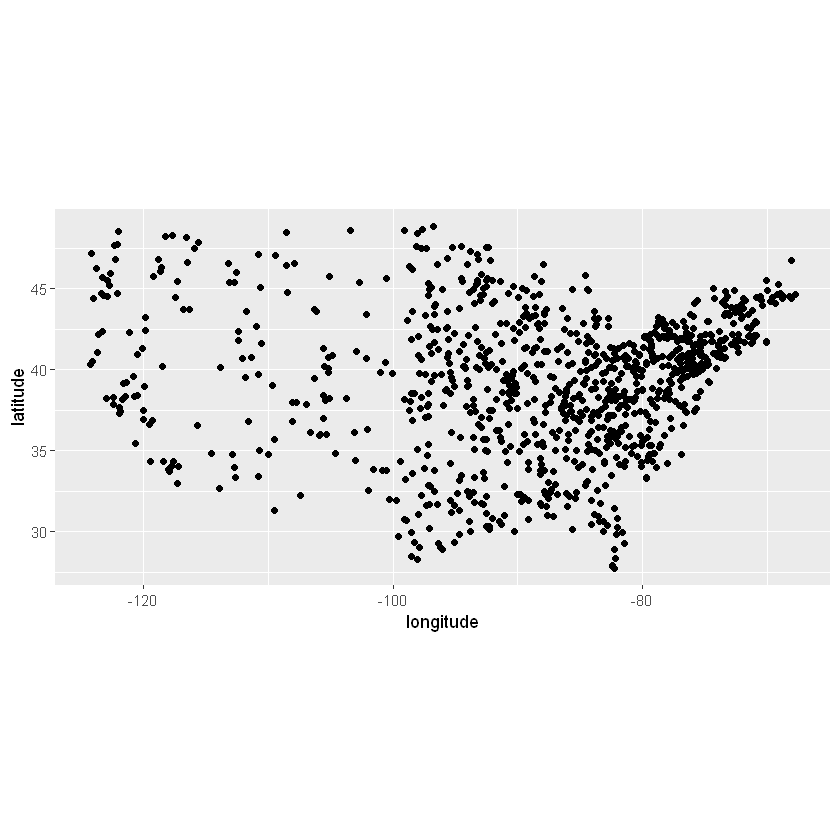

In [31]:
ggplot() + 
  # geom_polygon(data = sample_n(post_offices_clean, 100), aes(x = longitude, y = latitude)) + 
#   geom_polygon(data = usa, aes(x = long, y = lat, group = group), fill = 'white', col = 'black') +
#   scale_x_continuous(limits = c(25, 50)) + 
#   scale_y_continuous(limits = c(-130, -60))
  geom_point(data = sample_n(post_offices_clean, 1000), aes(x = longitude, y = latitude)) +
  coord_fixed(1.3) #+
#   transition_time(year_of_existence) +
#   labs(title = 'Year: {frame_time}')

In [110]:
orig_color = '#51658c'

ggplot() + 
    geom_point(
        data = post_offices_clean, 
        aes(x = longitude, y = latitude),
        col = orig_color
    ) +
    coord_fixed(1.3) +
    labs(
        x = '',
        y = '',
        title = "US Post Offices",
        subtitle = '{frame_time}'
    ) + 
    theme(
        axis.line = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(),
        panel.background = element_blank(),
        plot.title = element_text(size = 16, vjust = -90, color = orig_color),
        plot.subtitle = element_text(size = 16, vjust = -90, face = 'bold')
    ) +
    transition_time(year_of_existence)


Rendering [=>-------------------------------------------] at 21 fps ~ eta:  4s

Rendering [==>------------------------------------------] at 20 fps ~ eta:  5s

Rendering [==>-----------------------------------------] at 6.9 fps ~ eta: 14s

Rendering [===>----------------------------------------] at 7.4 fps ~ eta: 12s

Rendering [===>------------------------------------------] at 8 fps ~ eta: 11s

Rendering [===>----------------------------------------] at 8.5 fps ~ eta: 11s

Rendering [====>-----------------------------------------] at 9 fps ~ eta: 10s

Rendering [====>---------------------------------------] at 9.4 fps ~ eta:  9s

Rendering [=====>--------------------------------------] at 9.8 fps ~ eta:  9s

Rendering [=====>---------------------------------------] at 10 fps ~ eta:  8s

Rendering [======>-------------------------------------] at 6.8 fps ~ eta: 13s

Rendering [======>-------------------------------------] at 7.1 fps ~ eta: 12s

Rendering [======>---------------------

<img src="data:image/gif;base64,R0lGODlh4AHgAfU+AAAAADoAADo6AAAAOgA6Ojo6OmYAAGY6AGY6OgAAZgA6ZpA6AJA6OrZm
AJBmOrZmOraQOtuQOtuQZtu2Zv+2ZgA6kDpmkABmtjpmtlFljHFljFFloFFltHFloJBljGaQ
tjqQ21GByFGc2maQ23G2yGa223G27Wa2/62BjMicjOS2oP/bkP/PtP//tpC225DP/5Db/7bb
/63n/7b//8j/2tv/2+TnyP/nyP//2v//28j//9v/////7eT//////wAAACH5BAQKAAAAIf8L
TkVUU0NBUEUyLjADAQAAACwAAAAA4AHgAQAG/kCfcEgsGo/IpHLJbDqf0Kh0Sq1ar9isdsvt
er/gsHhMLpvP6LR6zW673/C4fE6v2+/4vH7P7/v/gIGCg4SFhoeIiYqLjI2Oj5CRkpOUlZaX
mJmam5ydnp+goaKjpKWmp6ipqqusra6vsLGys7S1tre4ubq7vL2+v8DBwsPExcbHyMnKy8zN
zs/Q0dLT1NXW19jZ2tvc3d7f4OHi4+Tl5ufo6err7O3u7/Dx8vP09fb3+Pn6+/z9/v8AAwoc
SLCgwYMIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qc
SbOmzZs4c+rcybOn/s+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOK
HUu2rNmzaNOqXcu2rdu3cOPKnUu3rt27ePPq3cu3r9+/gAMLHky4sOHDiBMrXsy4sePHkCNL
nky5suXLmDNr3sy5s+fPoEOLHk26tOnTqFOrXs26tevXsGPLnk27tu3buHPr3s27t+/fwIML
H068uPHjyJMrX868ufPn0KNLn069uvXr2LNr3869u/fv4MOLH0++vPnz6NOrX8++vfv38OPL
n0+/vv37+PNLz5BB/xj+/PkXBoD9CQhGgAYmqOCCDDbo4IMQRijhhBRWaOGFGGao4YYc/nbo
4YcghijiiCSWaOKJKKao4oostujiizDGKOOMNNZo44045qjjjjz26OOPQAYp5JBEFmnkkUgm
qeSSTDbp5JNQRinllFRWaeWVWGap5ZZcdunll2CGKeaYZJZp5plopqnmmmy26eabcMYp55x0
1mnnnXjmqeeefPbp55+ABirooIQWauihiCaq6KKMNuroo5BGKumklFZq6UM8oCBCESmE0IMQ
OHgAIAc6HJECgfxtOgULLyBxgwYAtjqECvyZQGsGJHgga3KZqjpEp5+ykMGuKWwggxHADhGq
p1GEuisRtMr6qqqhmuBDtc/1yimzKfjqg7bbfjoEC8Y2q6sR/jd0cKyyHljr7LXnOgfur57O
q0SyQ7wqq7C15gsrfy+8yh+zv3orhAoh2PAvgRzQEK8Pt2bga8TWCiEwwLLZ60OywhpsKsFC
kHussK2Guqm+IQ/7LhHYFiHyuzDHq0K52M587KvWouwDybFpjO/FpCKBL7ybZlrxzsayEDTL
D4PatMUavBBzyee2zO7RSuuQtW0+gyxEphmUyymqGVSssw/6hrq008/C2zbaUU/tNtxti+yv
1B6snbGm4Qqt98Ze381uq2BjvPLVRrxc9eKtprvuuGQP+y0Ksc7WLacnR+2y2PSKW8TZZwtR
rAyHF2wEwj3I/W7oSD8uNOevqbA2/rYab03E0EQYPS7sbpcO9bPYqr740Wwv4XtrJv+6tLAE
C0u86IFDTvWmdrduNbSSw00t43NDXK62NouetNjV90z5wJ7DCyDv0KfvMoBYr7/uqdFfnP3c
ch8M4MSjlrqz/JcKoAAHSMACGhBPDQAACIiwggMAAAAY2IEQcvCAAABgACUYAgUfqAAYMGgC
D1ygEFZgwQcqUAgJNCEATuCDHCxAhQPwoIE2GMIJvnCBEgBABXbQAgQAIIMJvIAPKHBBGOQA
AjqUoH9cCAACCOCEPmiBARIwgyTkIIg+iEASozjFKi6RAR+owQ1HGAAFOOCCIygCCQFgAQlq
cYdcjKGC3pgoQiKqEABCHMIaOzjEC7ogiw9kYYLoKAQ7ZlCLVCwCImfAxDsKcoZj9AEJEylF
ORKhkh6koQUOYElIQnGSVcQkBQpASQN0UghSTOQgI0lIEFJxjQtcZAPlqMU8rhKKfVShCLWo
yxa+0ISnFBAh9ejAAaRxCBKwIAY1eEYAKCAGB4ymNKdJzWpa85rYzKY2t8nNbnrzm+AMpzjH
Sc5ymvOc6EynOtfJzna6853wjKc850nPetrznvjMpz73yc9++vOfAA2oQAdK0IIa9KAITahC
F8rQhjr0oRCNqFiCAAAh+QQECgAAACwAAAAA4AHgAYUAAAA6AAA6OgAAADoAOjpmAABmOgAA
AGYAOmaQOgCQOjq2ZgCQZjq2ZjrbkDrbkGbbtmb/tmYAOpAAZrY6ZrZRZYxxZYxRZaBRZbRx
ZaCQZYw6kJBmkLY6kNtRgchRnNpmkNtxtshmtttxtu1mtv+tgYzInIzktqD/25D/z7Tb/7b/
/7aQz/+Q2/+t5/+2///I/9rb/9vk58j/58j//9r//9vI///b/////+3k//////8AAAAAAAAA
AAAAAAAAAAAG/kCdcEgsGo/IpHLJbDqf0Kh0Sq1ar9isdsvter/gsHhMLpvP6LR6zW673/C4
fE6v2+/4vH7P7/v/gIGCg4SFhoeIiYqLjI2Oj5CRkpOUlZaXmJmam5ydnp+goaKjpKWmp6ip
qqusra6vsLGys7S1tre4ubq7vL2+v8DBwsPExcbHyMnKy8zNzs/Q0dLT1NXW19jZ2tvc3d7f
4OHi4+Tl5ufo6err7O3u7/Dx8vP09fb3+Pn6+/z9/v8AAwocSLCgwYMIEypcyLChw4cQI0qc
SLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZs4c+rcybOn/s+fQIMK
HUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rdu3cOPK
nUu3rt27ePPq3cu3r9+/gAMLHky4sOHDiBMrXsy4sePHkCNLnky5suXLmDNr3sy5s+fPoEOL
Hk26tOnTqFOrXs26tevXsGPLnk27tu3buHPr3s27t+/fwIMLH068uPHjyJMrX868ufPn0KNL
n069uvXr2LNr3869u/fv4MOLH0++vPnz6NOrX8++vfv38OPLn0+/vv37+PNLr1BB/xj+/PkX
BoD9CQhGgAYmqOCCDDbo4IMQRijhhBRWaOGFGGao4YYc/nbo4YcghijiiCSWaOKJKKao4oos
tujiizDGKOOMNNZo44045qjjjjz26OOPQAYp5JBEFmnkkUgmqeSSTDbp5JNQRinllFRWaeWV
WGap5ZZcdunll2CGKeaYZJZp5plopqnmmmy26eabcMYp55x01mnnnXjmqeeefPbp55+ABiro
oIQWauihiCaq6KKMNuroo5BGKumklFZq6UM4lPBBESZ4kIMQNGgAIAY2HGECgfxtOkUKLCAx
gwUAtjrECfyNQGsFIWgga3KZqjpEp5+mUMGuJlzgghHADhGqp1GEuisRtMr6qqqhjqBDtc/1
yimzJviqg7bbfjpECsY2q6sR/jNkcKyyGljr7LXnOgfur57Oq0SyQ7wqq7C15gsrfyy8yh+z
v3orxAkeyPAvgRjAEK8Ot1bga8TWCiEwwLLZq0OywhpsKsFCkHussK2Guqm+IQ/7LhHYFiHy
uzDHe0K52M587KvWoqwDybFpjO/FpCKBL7ybZlrxzsamEDTLD4PatMUWsBBzyee2zO7RStuQ
tW0+gyxEphWUyymqFVSssw76hrq008/C2zbaUU/tNtxti+yv1BqsnbGm4Qqt98Ze381uq2Bj
vPLVRrxc9eKtprvuuGQP+20Jsc

In [111]:
anim_save('us_post_offices.gif')